In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import acquire, prepare, model

from sklearn.cluster import KMeans

### 1. Clustering with the iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
# Load the iris dataset

iris = acquire.get_iris_data()
iris.shape

(150, 7)

In [3]:
# Prepare the iris dataset 

train, validate, test = prepare.prep_iris(iris)
train.shape

(84, 8)

In [4]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0


In [5]:
train.isna().sum().sum()

0

In [4]:
# Scale the features

scaler, train_scaled, validate_scaled, test_scaled = prepare.standard_scaler(train, validate, test)
train_scaled.shape

(84, 7)

In [7]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
79,-0.222677,-1.066026,-0.157388,-0.272124,-0.707107,1.414214,-0.707107
36,-0.484283,0.953813,-1.433059,-1.341522,1.414214,-0.707107,-0.707107
133,0.562142,-0.617173,0.770373,0.396250,-0.707107,-0.707107,1.414214
95,-0.222677,-0.168320,0.248507,-0.004774,-0.707107,1.414214,-0.707107
18,-0.222677,1.627092,-1.201119,-1.207847,1.414214,-0.707107,-0.707107


In [8]:
# Show column names

train_scaled.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_setosa', 'species_versicolor', 'species_virginica'],
      dtype='object')

In [5]:
# Drop species columns

train_scaled.drop(columns = ['species_setosa', 'species_versicolor', 'species_virginica'], inplace=True)
train_scaled.shape

(84, 4)

### 1-a. Choose features other than the ones used in the lesson.

In [9]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
79,-0.222677,-1.066026,-0.157388,-0.272124
36,-0.484283,0.953813,-1.433059,-1.341522
133,0.562142,-0.617173,0.770373,0.396250
95,-0.222677,-0.168320,0.248507,-0.004774
18,-0.222677,1.627092,-1.201119,-1.207847


In [24]:
# Choose all 4 features to cluster on

X =train_scaled[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Choose k = 3
# To make the randomness deterministic, set the random_state=1
kmeans = KMeans(n_clusters=3, random_state=1)

# Create and fit the model

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [25]:
# Look at the model's output
# Look at the centroids

pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,0.015147,-0.712384,0.366235,0.274728
1,-1.021511,0.881676,-1.312947,-1.241266
2,1.221845,-0.051228,1.072904,1.116932


In [26]:
# Add clustering results to the train dataset

train['cluster'] = kmeans.labels_
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,cluster
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0,1
133,6.3,2.8,5.1,1.5,virginica,0,0,1,0
95,5.7,3.0,4.2,1.2,versicolor,0,1,0,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0,1


### 1-b. Visualize the results of your clustering

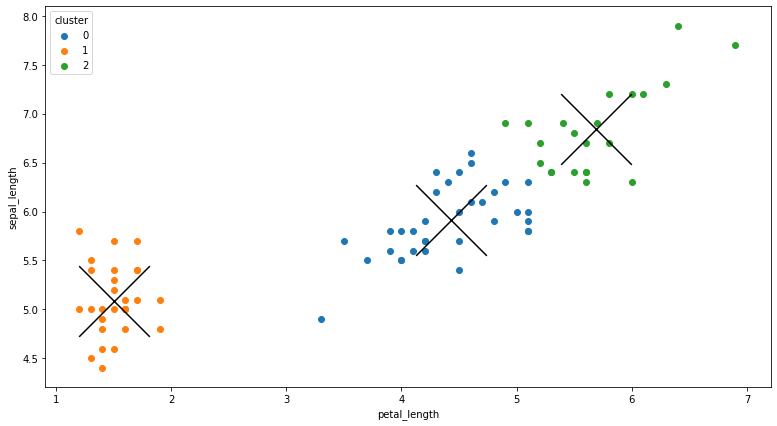

In [68]:
# Create a figure and a set of subplots

fig, ax = plt.subplots(figsize=(13,7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

# Add the centroids in the graph

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', 
                                             marker='x', s=5000, ax=ax, c='black')

### 1-c. Use the elbow method to visually select a good value for `k`.

In [45]:
# Sum of squared distances from each point to its cluster center
kmeans.inertia_

80.37054962147457

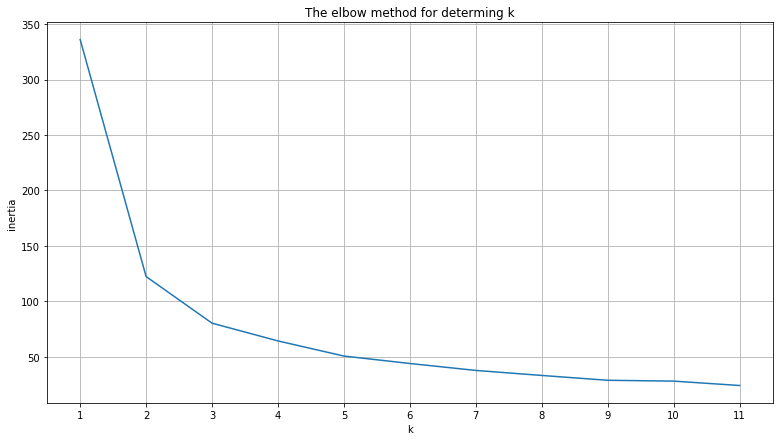

In [54]:
# Visualize Elbwo Method

output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13,7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1,12), title='The elbow method for determing k')
ax.grid()

### Test the functions

In [6]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
79,-0.222677,-1.066026,-0.157388,-0.272124
36,-0.484283,0.953813,-1.433059,-1.341522
133,0.562142,-0.617173,0.770373,0.396250
95,-0.222677,-0.168320,0.248507,-0.004774
18,-0.222677,1.627092,-1.201119,-1.207847


In [7]:
# Test function 'kmeans_labels'

cols_to_cluster = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

cluster = model.kmeans_labels(train_scaled, cols_to_cluster, 3)
cluster.head()

# Pass the test

,cluster
79,0
36,1
133,0
95,0
18,1


In [8]:
# Concat the cluster to the train dataset

train = pd.concat([train, cluster], axis=1)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,cluster
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0,1
133,6.3,2.8,5.1,1.5,virginica,0,0,1,0
95,5.7,3.0,4.2,1.2,versicolor,0,1,0,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0,1


In [11]:
# Test 

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0
...,...,...,...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa,1,0,0
85,6.0,3.4,4.5,1.6,versicolor,0,1,0
55,5.7,2.8,4.5,1.3,versicolor,0,1,0
44,5.1,3.8,1.9,0.4,setosa,1,0,0
